In [1]:
from sympy import symbols, Derivative

In [2]:
x = symbols('x')
fx = 3*x**2 -4*x +1

In [3]:
Derivative(fx, x).doit()

6*x - 4

In [4]:
d = Derivative(fx, x).doit()
d.subs({x:2})

8

In [5]:
w, b, y = symbols('w, b, y')
fx = (y - w *x-b)**2

In [6]:
Derivative(fx,w).doit()

-2*x*(-b - w*x + y)

In [7]:
Derivative(fx, b).doit()

2*b + 2*w*x - 2*y

In [8]:
del w, b, y, x

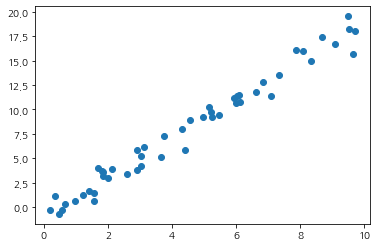

In [9]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2*x -1 + rng.randn(50)
plt.scatter(x,y)
plt.show()

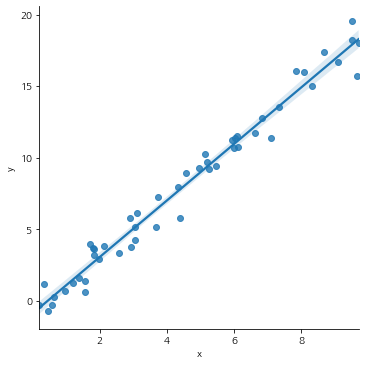

In [10]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame()
df['x'] = pd.Series(x)
df['y'] = pd.Series(y)
sns.lmplot(x='x', y='y', data=df)
plt.show()

In [11]:
Qx = df['x'] - df['x'].mean()
Qy = df['y'] - df['y'].mean()
w = sum(Qx*Qy) / sum(Qx**2)
print(w)

1.9776566003853098


In [12]:
b = df['y'].mean() - w*df['x'].mean()
print(b)

-0.9033107255311075


In [13]:
xfit = np.linspace(-1, 11, 10)
xfit

array([-1.        ,  0.33333333,  1.66666667,  3.        ,  4.33333333,
        5.66666667,  7.        ,  8.33333333,  9.66666667, 11.        ])

In [14]:
yfit = w * xfit + b
print(yfit)

[-2.88096733 -0.24409186  2.39278361  5.02965908  7.66653454 10.30341001
 12.94028548 15.57716094 18.21403641 20.85091188]


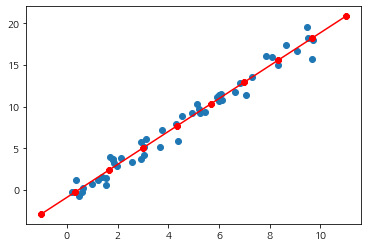

In [15]:
plt.scatter(x,y)
plt.plot(xfit, yfit, c='r', marker='8')
plt.show()

In [16]:
def numerical_derivative(func, x):
    delta = 1E-4
    return (func(x+delta) - func(x-delta)) / (2*delta)

In [17]:
def func1(x):
    return x**2

In [18]:
numerical_derivative(func1, 2.0)

4.000000000004

In [19]:
for i in range(0,11):
    print(i, ':', numerical_derivative(func1, float(i)))

0 : 0.0
1 : 1.9999999999992246
2 : 4.000000000004
3 : 6.000000000012662
4 : 7.999999999999119
5 : 9.999999999976694
6 : 11.999999999972033
7 : 13.999999999967372
8 : 15.999999999927184
9 : 17.99999999995805
10 : 19.99999999995339


In [20]:
import numpy as np
def numerical_derivative(f, x):
    delta = 1E-4
    grad = np.zeros_like(x)
    itr = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not itr.finished:
        idx = itr.multi_index
        
        tmp_val = x[idx]
        x[idx] = float(tmp_val + delta)
        fx1 = f(x)
        
        x[idx] = float(tmp_val - delta)
        fx2 = f(x)
        grad[idx] = (fx1-fx2) / (2*delta)
        
        x[idx] = tmp_val
        itr.iternext()
        
    else:
        return grad

In [21]:
def MSE(p):
    global X, y
    y_pred =  X * p[0] + p[1]
    return  np.sum((y-y_pred)**2)/len(X)

In [22]:
X = np.array([-3, -2, -1, 0, 1, 2, 3])
y = np.array([-2, -1, 0, 1, 2, 3, 4])

In [23]:
import random

W = float(random.randint(-10,10))
b = float(random.randint(-10,10))

W_history =  [W]
b_history = [b]

cost = MSE(np.array([W, b]))
print("Epochs:",0,"\tW:",W,"\tb:",b,"\tcost:",cost)

rate = 0.01
MaxItrs = 1000

for epoch in range(1,MaxItrs+1) :   #epoch: 반복 횟수
    gradientW, gradientB  =  numerical_derivative(MSE, np.array([W,b]))
    newW = W - rate * gradientW 
    newb = b - rate * gradientB 
    W_history.append(newW)
    b_history.append(newb)
    W, b = newW, newb
    
    cost = MSE(np.array([W, b]))

    if len(str(epoch))==1 or epoch %100==0 or epoch==MaxItrs:
        print('Epochs:', epoch, 
              'gradient W: %.2f, gradient b:%.2f, ' %(gradientW, gradientB), 
              end=' ')
        print("W:%.2f, b:%.2f, cost: %.2f" % (W, b, cost), end='') #Print result 
        input()


Epochs: 0 	W: 3.0 	b: 10.0 	cost: 97.0
Epochs: 1 gradient W: 16.00, gradient b:18.00,  W:2.84, b:9.82, cost: 91.33
Epochs: 2 gradient W: 14.72, gradient b:17.64,  W:2.69, b:9.64, cost: 86.17
Epochs: 3 gradient W: 13.54, gradient b:17.29,  W:2.56, b:9.47, cost: 81.45
Epochs: 4 gradient W: 12.46, gradient b:16.94,  W:2.43, b:9.30, cost: 77.12
Epochs: 5 gradient W: 11.46, gradient b:16.60,  W:2.32, b:9.14, cost: 73.13
Epochs: 6 gradient W: 10.55, gradient b:16.27,  W:2.21, b:8.97, cost: 69.44
Epochs: 7 gradient W: 9.70, gradient b:15.95,  W:2.12, b:8.81, cost: 66.02
Epochs: 8 gradient W: 8.93, gradient b:15.63,  W:2.03, b:8.66, cost: 62.84
Epochs: 9 gradient W: 8.21, gradient b:15.31,  W:1.94, b:8.50, cost: 59.87
Epochs: 100 gradient W: 0.00, gradient b:2.44,  W:1.00, b:2.19, cost: 1.42
Epochs: 200 gradient W: 0.00, gradient b:0.32,  W:1.00, b:1.16, cost: 0.03
Epochs: 300 gradient W: 0.00, gradient b:0.04,  W:1.00, b:1.02, cost: 0.00
Epochs: 400 gradient W: 0.00, gradient b:0.01,  W:1.00,

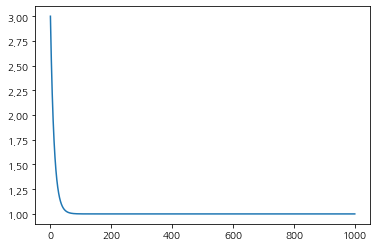

In [24]:
plt.plot(W_history)
plt.show()

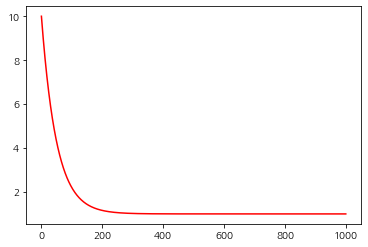

In [25]:
plt.plot(b_history, 'r')
plt.show()

In [26]:
def MSE(W, b):
    global X, y
    y_pred = X*W + b
    return np.sum((y-y_pred)**2)/len(X)

In [27]:
def g_W(W,b):
    global X, y
    return np.sum(-2*X*(-W*X -b +y))/len(X)

In [28]:
def g_b(W,b):
    global X, y
    return np.sum(2*(W*X +b-y))/len(X)

In [29]:
X = np.array([-3, -2, -1, 0, 1, 2, 3])
y = np.array([-2, -1, 0, 1, 2, 3, 4])

In [30]:
import random

W = float(random.randint(-10,10))
b = float(random.randint(-10,10))

W_history =  [W]
b_history = [b]

cost = MSE(W, b)
print("Epochs:",0,"\tW:",W,"\tb:",b,"\tcost:",cost)

rate = 0.01
MaxItrs = 1000

for epoch in range(1,MaxItrs+1) :   #epoch: 반복 횟수
    gradientW, gradientB  =  g_W(W,b), g_b(W,b)
    newW = W - rate * gradientW 
    newb = b - rate * gradientB 
    W_history.append(newW)
    b_history.append(newb)
    W, b = newW, newb
    
    cost = MSE(W, b)

    if len(str(epoch))==1 or epoch %100==0 or epoch==MaxItrs:
        print('Epochs:', epoch, 
              'gradient W: %.2f, gradient b:%.2f, ' %(gradientW, gradientB), 
              end=' ')
        print("W:%.2f, b:%.2f, cost: %.2f" % (W, b, cost), end='\n') #Print result 
        input()


Epochs: 0 	W: 4.0 	b: 7.0 	cost: 72.0
Epochs: 1 gradient W: 24.00, gradient b:12.00,  W:3.76, b:6.88, cost: 65.04

Epochs: 2 gradient W: 22.08, gradient b:11.76,  W:3.54, b:6.76, cost: 59.00

Epochs: 3 gradient W: 20.31, gradient b:11.52,  W:3.34, b:6.65, cost: 53.72

Epochs: 4 gradient W: 18.69, gradient b:11.29,  W:3.15, b:6.53, cost: 49.10

Epochs: 5 gradient W: 17.19, gradient b:11.07,  W:2.98, b:6.42, cost: 45.05

Epochs: 6 gradient W: 15.82, gradient b:10.85,  W:2.82, b:6.32, cost: 41.49

Epochs: 7 gradient W: 14.55, gradient b:10.63,  W:2.67, b:6.21, cost: 38.33

Epochs: 8 gradient W: 13.39, gradient b:10.42,  W:2.54, b:6.10, cost: 35.54

Epochs: 9 gradient W: 12.32, gradient b:10.21,  W:2.42, b:6.00, cost: 33.05

Epochs: 100 gradient W: 0.01, gradient b:1.62,  W:1.00, b:1.80, cost: 0.63

Epochs: 200 gradient W: 0.00, gradient b:0.22,  W:1.00, b:1.11, cost: 0.01

Epochs: 300 gradient W: 0.00, gradient b:0.03,  W:1.00, b:1.01, cost: 0.00

Epochs: 400 gradient W: 0.00, gradient b:

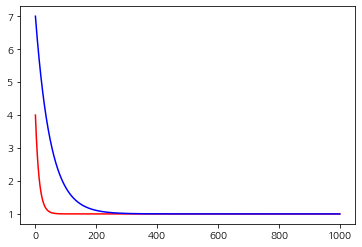

In [31]:
iters = np.arange(MaxItrs+1)
plt.plot(iters, W_history, 'r', b_history, 'b')
plt.show()

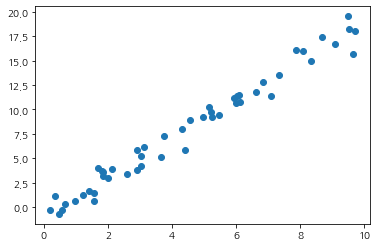

In [32]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2*x -1 + rng.randn(50)
plt.scatter(x,y)
plt.show()

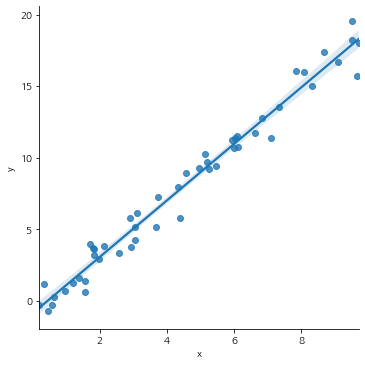

In [33]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame()
df['x'] = pd.Series(x)
df['y'] = pd.Series(y)
sns.lmplot(x='x', y='y', data=df)
plt.show()

In [34]:
X = df['x'].values
X.shape, type(X)

((50,), numpy.ndarray)

In [35]:
y = df.y.values
y.shape, type(y)

((50,), numpy.ndarray)

In [36]:
def MSE(p):
    global X, y
    y_pred =  X * p[0] + p[1]
    return  np.sum((y-y_pred)**2)/len(X)

In [37]:
x = df['x'].values
x.shape, type(x)

((50,), numpy.ndarray)

In [38]:
X = x.reshape(-1, 1)
X.shape

(50, 1)

In [39]:
y = df.y.values
y.shape, type(y)

((50,), numpy.ndarray)

In [40]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(copy_X=True, fit_intercept=True,
                        normalize=False)

In [41]:
model.fit(X,y)

LinearRegression()

In [42]:
model.coef_, model.intercept_

(array([1.9776566]), -0.9033107255311146)

In [43]:
model.intercept_

-0.9033107255311146

In [44]:
xfit = np.linspace(-1, 11, 10)
xfit

array([-1.        ,  0.33333333,  1.66666667,  3.        ,  4.33333333,
        5.66666667,  7.        ,  8.33333333,  9.66666667, 11.        ])

In [45]:
Xfit = xfit.reshape(-1,1)
yfit = model.predict(Xfit)
yfit

array([-2.88096733, -0.24409186,  2.39278361,  5.02965908,  7.66653454,
       10.30341001, 12.94028548, 15.57716094, 18.21403641, 20.85091188])

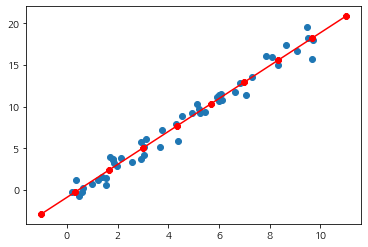

In [46]:
plt.scatter(x,y)
plt.plot(xfit, yfit, c='r', marker='8')
plt.show()

In [47]:
from sklearn import datasets
b_house = datasets.load_boston()
dir(b_house)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [48]:
b_house.filename

'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv'

In [49]:
house = pd.read_csv(b_house.filename, header=1)

In [50]:
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [51]:
house.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [52]:
house.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price']
      

In [53]:
house.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [54]:
x = house.copy()
y = x.pop('Price')

In [55]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [56]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [57]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [59]:
model.fit(x,y)

LinearRegression()

In [60]:
print('기울기:', model.coef_)
print('y절편:', model.intercept_)

기울기: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
y절편: 36.459488385089806


In [61]:
from sklearn.metrics import mean_squared_error

prediction = model.predict(x)


In [62]:
print('score=', model.score(, y))
print('MSE=', mean_squared_error(prediction,house['Price']))

score= 0.7406426641094095
MSE= 21.894831181729202


In [63]:
import numpy as np
def sigmoid(z):
    return np.exp(z) / (1 + np.exp(z))


In [64]:
def numerical_derivative(f, x):
    delta = 1E-4
    grad = np.zeros_like(x)
    itr = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not itr.finished:
        idx = itr.multi_index
        
        tmp_val = x[idx]
        x[idx] = float(tmp_val + delta)
        fx1 = f(x)
        
        x[idx] = float(tmp_val - delta)
        fx2 = f(x)
        grad[idx] = (fx1-fx2) / (2*delta)
        
        x[idx] = tmp_val
        itr.iternext()
        
    else:
        return grad

In [68]:
def cross_entropy(p):
    global X, y
    z = X * p[0] + p[1]
    y_p = sigmoid(z)
    return (-1) * np.sum((y*np.log(y_p))+((1-y)*np.log(1-y_p)))   

In [69]:
X=np.array([10., 9., 3., 2., 1.])
y=np.array([1.,  1., 0., 0., 0.])

In [70]:
import random

W = float(random.randint(-10,10))
b = float(random.randint(-10,10))

W_history = [W]
b_history = [b]

cost = cross_entropy(np.array([W, b]))
print("Epochs:",0,"\tW:",W,"\tb:",b,"\tcost:",cost)

rate = 0.1
MaxItrs = 20000

for epoch in range(1,MaxItrs+1) :   #epoch: 반복 횟수
    gradientW, gradientB  =  numerical_derivative(cross_entropy, np.array([W, b]))
    newW = W - rate * gradientW 
    newb = b - rate * gradientB 
    W_history.append(newW)
    b_history.append(newb)
    W, b = newW, newb
    
    cost = cross_entropy(np.array([W, b]))

    if len(str(epoch))==1 or epoch %400==0 or epoch==MaxItrs:
        print('Epochs:', epoch, 
              'gradient W: %.2f, gradient b:%.2f, ' %(gradientW, gradientB), 
              end=' ')
        print("W:%.2f, b:%.2f, cost: %.2f" % (W, b, cost)) #Print result 
        

<ipython-input-68-34347781a2b1>:5: RuntimeWarning: divide by zero encountered in log
  return (-1) * np.sum((y*np.log(y_p))+((1-y)*np.log(1-y_p)))
<ipython-input-68-34347781a2b1>:5: RuntimeWarning: invalid value encountered in multiply
  return (-1) * np.sum((y*np.log(y_p))+((1-y)*np.log(1-y_p)))


Epochs: 0 	W: 5.0 	b: 1.0 	cost: nan
Epochs: 1 gradient W: nan, gradient b:nan,  W:nan, b:nan, cost: nan
Epochs: 2 gradient W: nan, gradient b:nan,  W:nan, b:nan, cost: nan
Epochs: 3 gradient W: nan, gradient b:nan,  W:nan, b:nan, cost: nan
Epochs: 4 gradient W: nan, gradient b:nan,  W:nan, b:nan, cost: nan
Epochs: 5 gradient W: nan, gradient b:nan,  W:nan, b:nan, cost: nan
Epochs: 6 gradient W: nan, gradient b:nan,  W:nan, b:nan, cost: nan
Epochs: 7 gradient W: nan, gradient b:nan,  W:nan, b:nan, cost: nan
Epochs: 8 gradient W: nan, gradient b:nan,  W:nan, b:nan, cost: nan
Epochs: 9 gradient W: nan, gradient b:nan,  W:nan, b:nan, cost: nan
Epochs: 400 gradient W: nan, gradient b:nan,  W:nan, b:nan, cost: nan
Epochs: 800 gradient W: nan, gradient b:nan,  W:nan, b:nan, cost: nan
Epochs: 1200 gradient W: nan, gradient b:nan,  W:nan, b:nan, cost: nan
Epochs: 1600 gradient W: nan, gradient b:nan,  W:nan, b:nan, cost: nan
Epochs: 2000 gradient W: nan, gradient b:nan,  W:nan, b:nan, cost: na

In [71]:
def predict(x):
    global W,b
    z = W*x +b
    y_p = sigmoid(z)
    if  y_p >= 0.5:
        return 1, y_p
    else:
        return 0, (1-y_p)

In [72]:
for i in range(1,11):
    print(i, ':', predict(float(i)))
    

1 : (0, nan)
2 : (0, nan)
3 : (0, nan)
4 : (0, nan)
5 : (0, nan)
6 : (0, nan)
7 : (0, nan)
8 : (0, nan)
9 : (0, nan)
10 : (0, nan)


In [74]:
x_val = np.linspace(1,10,1000)
z = W * x_val + b
y_p = sigmoid(z)

In [75]:
from sklearn.datasets import load_iris
iris = load_iris()

In [77]:
import pandas as pd
df= pd.DataFrame(iris.data, columns=iris.feature_names )
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [78]:
df['species'] = pd.Series(iris.target)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [79]:
sl_df = pd.DataFrame()

In [80]:
sl_df['petal_length'] = df['petal length (cm)']
sl_df['species'] = df['species']
sl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   petal_length  150 non-null    float64
 1   species       150 non-null    int32  
dtypes: float64(1), int32(1)
memory usage: 1.9 KB


In [81]:
sl_df = sl_df[:100]
sl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   petal_length  100 non-null    float64
 1   species       100 non-null    int32  
dtypes: float64(1), int32(1)
memory usage: 1.3 KB


In [82]:
sl_df.describe()

,petal_length,species
count,100.000000,100.000000
mean,2.861000,0.500000
std,1.449549,0.502519
min,1.000000,0.000000
25%,1.500000,0.000000
50%,2.450000,0.500000
75%,4.325000,1.000000
max,5.100000,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


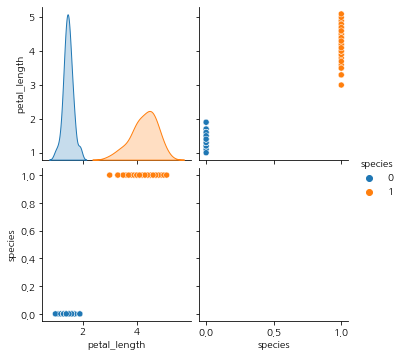

In [83]:
sns.pairplot(data=sl_df, vars=['petal_length', 'species'], hue='species')

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sl_df.iloc[:,:1],
                                                   sl_df.iloc[:,1],
                                                   test_size=0.33)
y_train

11    0
27    0
23    0
56    1
37    0
     ..
43    0
30    0
84    1
99    1
98    1
Name: species, Length: 67, dtype: int32

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
lr = LogisticRegression()

In [87]:
lr.fit(X_train, y_train)

LogisticRegression()

In [88]:
print(lr.coef_, lr.intercept_)

[[2.65099259]] [-7.24952541]


In [89]:
X = np.linspace(1,sl_df['petal_length'].max(),1000)
val = np.exp(lr.coef_[0][0] * X + lr.intercept_[0])
Y = val / (1+val)

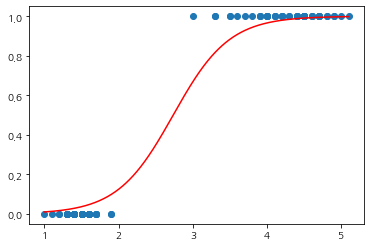

In [90]:
plt.scatter(sl_df['petal_length'], sl_df['species'])
plt.plot(X, Y, 'r')
plt.show()

In [93]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_train, lr.predict(X_train)))

[[35  0]
 [ 0 32]]


In [92]:
print(classification_report(y_train, lr.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        32

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [94]:
print(confusion_matrix(y_test, lr.predict(X_test)))

[[15  0]
 [ 0 18]]


In [95]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        18

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33

